In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import time
import warnings
import sqlite3
from sqlalchemy import create_engine # database connection
import csv
import os
warnings.filterwarnings("ignore")
import datetime as dt
import numpy as np
from nltk.corpus import stopwords
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics.classification import accuracy_score, log_loss
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.cross_validation import StratifiedKFold 
from collections import Counter, defaultdict
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import math
from sklearn.metrics import normalized_mutual_info_score
from sklearn.ensemble import RandomForestClassifier



from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDClassifier
from mlxtend.classifier import StackingClassifier

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, auc, roc_curve
from numpy.core.umath_tests import inner1d

<h2> 4.1 Reading data from file and storing into sql table </h2>

In [2]:
#Creating db file from csv
if not os.path.isfile('train.db'):
    disk_engine = create_engine('sqlite:///train.db')
    start = dt.datetime.now()
    chunksize = 180000
    j = 0
    index_start = 1
    for df in pd.read_csv('final_features.csv', names=['Unnamed: 0','id','is_duplicate','cwc_min','cwc_max','csc_min','csc_max','ctc_min','ctc_max','last_word_eq','first_word_eq','abs_len_diff','mean_len','token_set_ratio','token_sort_ratio','fuzz_ratio','fuzz_partial_ratio','longest_substr_ratio','freq_qid1','freq_qid2','q1len','q2len','q1_n_words','q2_n_words','word_Common','word_Total','word_share','freq_q1+q2','freq_q1-q2','0_x','1_x','2_x','3_x','4_x','5_x','6_x','7_x','8_x','9_x','10_x','11_x','12_x','13_x','14_x','15_x','16_x','17_x','18_x','19_x','20_x','21_x','22_x','23_x','24_x','25_x','26_x','27_x','28_x','29_x','30_x','31_x','32_x','33_x','34_x','35_x','36_x','37_x','38_x','39_x','40_x','41_x','42_x','43_x','44_x','45_x','46_x','47_x','48_x','49_x','50_x','51_x','52_x','53_x','54_x','55_x','56_x','57_x','58_x','59_x','60_x','61_x','62_x','63_x','64_x','65_x','66_x','67_x','68_x','69_x','70_x','71_x','72_x','73_x','74_x','75_x','76_x','77_x','78_x','79_x','80_x','81_x','82_x','83_x','84_x','85_x','86_x','87_x','88_x','89_x','90_x','91_x','92_x','93_x','94_x','95_x','96_x','97_x','98_x','99_x','100_x','101_x','102_x','103_x','104_x','105_x','106_x','107_x','108_x','109_x','110_x','111_x','112_x','113_x','114_x','115_x','116_x','117_x','118_x','119_x','120_x','121_x','122_x','123_x','124_x','125_x','126_x','127_x','128_x','129_x','130_x','131_x','132_x','133_x','134_x','135_x','136_x','137_x','138_x','139_x','140_x','141_x','142_x','143_x','144_x','145_x','146_x','147_x','148_x','149_x','150_x','151_x','152_x','153_x','154_x','155_x','156_x','157_x','158_x','159_x','160_x','161_x','162_x','163_x','164_x','165_x','166_x','167_x','168_x','169_x','170_x','171_x','172_x','173_x','174_x','175_x','176_x','177_x','178_x','179_x','180_x','181_x','182_x','183_x','184_x','185_x','186_x','187_x','188_x','189_x','190_x','191_x','192_x','193_x','194_x','195_x','196_x','197_x','198_x','199_x','200_x','201_x','202_x','203_x','204_x','205_x','206_x','207_x','208_x','209_x','210_x','211_x','212_x','213_x','214_x','215_x','216_x','217_x','218_x','219_x','220_x','221_x','222_x','223_x','224_x','225_x','226_x','227_x','228_x','229_x','230_x','231_x','232_x','233_x','234_x','235_x','236_x','237_x','238_x','239_x','240_x','241_x','242_x','243_x','244_x','245_x','246_x','247_x','248_x','249_x','250_x','251_x','252_x','253_x','254_x','255_x','256_x','257_x','258_x','259_x','260_x','261_x','262_x','263_x','264_x','265_x','266_x','267_x','268_x','269_x','270_x','271_x','272_x','273_x','274_x','275_x','276_x','277_x','278_x','279_x','280_x','281_x','282_x','283_x','284_x','285_x','286_x','287_x','288_x','289_x','290_x','291_x','292_x','293_x','294_x','295_x','296_x','297_x','298_x','299_x','300_x','301_x','302_x','303_x','304_x','305_x','306_x','307_x','308_x','309_x','310_x','311_x','312_x','313_x','314_x','315_x','316_x','317_x','318_x','319_x','320_x','321_x','322_x','323_x','324_x','325_x','326_x','327_x','328_x','329_x','330_x','331_x','332_x','333_x','334_x','335_x','336_x','337_x','338_x','339_x','340_x','341_x','342_x','343_x','344_x','345_x','346_x','347_x','348_x','349_x','350_x','351_x','352_x','353_x','354_x','355_x','356_x','357_x','358_x','359_x','360_x','361_x','362_x','363_x','364_x','365_x','366_x','367_x','368_x','369_x','370_x','371_x','372_x','373_x','374_x','375_x','376_x','377_x','378_x','379_x','380_x','381_x','382_x','383_x','0_y','1_y','2_y','3_y','4_y','5_y','6_y','7_y','8_y','9_y','10_y','11_y','12_y','13_y','14_y','15_y','16_y','17_y','18_y','19_y','20_y','21_y','22_y','23_y','24_y','25_y','26_y','27_y','28_y','29_y','30_y','31_y','32_y','33_y','34_y','35_y','36_y','37_y','38_y','39_y','40_y','41_y','42_y','43_y','44_y','45_y','46_y','47_y','48_y','49_y','50_y','51_y','52_y','53_y','54_y','55_y','56_y','57_y','58_y','59_y','60_y','61_y','62_y','63_y','64_y','65_y','66_y','67_y','68_y','69_y','70_y','71_y','72_y','73_y','74_y','75_y','76_y','77_y','78_y','79_y','80_y','81_y','82_y','83_y','84_y','85_y','86_y','87_y','88_y','89_y','90_y','91_y','92_y','93_y','94_y','95_y','96_y','97_y','98_y','99_y','100_y','101_y','102_y','103_y','104_y','105_y','106_y','107_y','108_y','109_y','110_y','111_y','112_y','113_y','114_y','115_y','116_y','117_y','118_y','119_y','120_y','121_y','122_y','123_y','124_y','125_y','126_y','127_y','128_y','129_y','130_y','131_y','132_y','133_y','134_y','135_y','136_y','137_y','138_y','139_y','140_y','141_y','142_y','143_y','144_y','145_y','146_y','147_y','148_y','149_y','150_y','151_y','152_y','153_y','154_y','155_y','156_y','157_y','158_y','159_y','160_y','161_y','162_y','163_y','164_y','165_y','166_y','167_y','168_y','169_y','170_y','171_y','172_y','173_y','174_y','175_y','176_y','177_y','178_y','179_y','180_y','181_y','182_y','183_y','184_y','185_y','186_y','187_y','188_y','189_y','190_y','191_y','192_y','193_y','194_y','195_y','196_y','197_y','198_y','199_y','200_y','201_y','202_y','203_y','204_y','205_y','206_y','207_y','208_y','209_y','210_y','211_y','212_y','213_y','214_y','215_y','216_y','217_y','218_y','219_y','220_y','221_y','222_y','223_y','224_y','225_y','226_y','227_y','228_y','229_y','230_y','231_y','232_y','233_y','234_y','235_y','236_y','237_y','238_y','239_y','240_y','241_y','242_y','243_y','244_y','245_y','246_y','247_y','248_y','249_y','250_y','251_y','252_y','253_y','254_y','255_y','256_y','257_y','258_y','259_y','260_y','261_y','262_y','263_y','264_y','265_y','266_y','267_y','268_y','269_y','270_y','271_y','272_y','273_y','274_y','275_y','276_y','277_y','278_y','279_y','280_y','281_y','282_y','283_y','284_y','285_y','286_y','287_y','288_y','289_y','290_y','291_y','292_y','293_y','294_y','295_y','296_y','297_y','298_y','299_y','300_y','301_y','302_y','303_y','304_y','305_y','306_y','307_y','308_y','309_y','310_y','311_y','312_y','313_y','314_y','315_y','316_y','317_y','318_y','319_y','320_y','321_y','322_y','323_y','324_y','325_y','326_y','327_y','328_y','329_y','330_y','331_y','332_y','333_y','334_y','335_y','336_y','337_y','338_y','339_y','340_y','341_y','342_y','343_y','344_y','345_y','346_y','347_y','348_y','349_y','350_y','351_y','352_y','353_y','354_y','355_y','356_y','357_y','358_y','359_y','360_y','361_y','362_y','363_y','364_y','365_y','366_y','367_y','368_y','369_y','370_y','371_y','372_y','373_y','374_y','375_y','376_y','377_y','378_y','379_y','380_y','381_y','382_y','383_y'], chunksize=chunksize, iterator=True, encoding='utf-8', ):
        df.index += index_start
        j+=1
        print('{} rows'.format(j*chunksize))
        df.to_sql('data', disk_engine, if_exists='append')
        index_start = df.index[-1] + 1

In [3]:
#http://www.sqlitetutorial.net/sqlite-python/create-tables/
def create_connection(db_file):
    """ create a database connection to the SQLite database
        specified by db_file
    :param db_file: database file
    :return: Connection object or None
    """
    try:
        conn = sqlite3.connect(db_file)
        return conn
    except Error as e:
        print(e)
 
    return None


def checkTableExists(dbcon):
    cursr = dbcon.cursor()
    str = "select name from sqlite_master where type='table'"
    table_names = cursr.execute(str)
    print("Tables in the databse:")
    tables =table_names.fetchall() 
    print(tables[0][0])
    return(len(tables))

In [4]:
read_db = 'train.db'
conn_r = create_connection(read_db)
checkTableExists(conn_r)
conn_r.close()

Tables in the databse:
data


In [5]:
# try to sample data according to the computing power you have
if os.path.isfile(read_db):
    conn_r = create_connection(read_db)
    if conn_r is not None:
        # for selecting first 1M rows
        # data = pd.read_sql_query("""SELECT * FROM data LIMIT 100001;""", conn_r)
        
        # for selecting random points
        data = pd.read_sql_query("SELECT * From data ORDER BY RANDOM() LIMIT 100001;", conn_r)
        conn_r.commit()
        conn_r.close()

In [6]:
# remove the first row 
data.drop(data.index[0], inplace=True)
y_true = data['is_duplicate']
data.drop(['Unnamed: 0', 'id','index','is_duplicate'], axis=1, inplace=True)

In [7]:
data.head()

,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,...,374_y,375_y,376_y,377_y,378_y,379_y,380_y,381_y,382_y,383_y
1,0.399992000159997,0.249996875039062,0.999980000399992,0.384612426058261,0.699993000069999,0.291665451393952,0.0,1.0,14.0,17.0,...,23.5845205634832,-4.32141046412289,26.8576771318912,-10.3363332599402,25.7931172251701,19.9641398862004,-15.4743487499654,13.1452868692577,2.75279192440212,9.86241550184786
2,0.999980000399992,0.833319444675922,0.999980000399992,0.999980000399992,0.999990000099999,0.90908264470323,1.0,1.0,1.0,10.5,...,-4.72720210254192,15.3848682045937,3.2693422883749,-5.33895015716553,0.267495613545179,1.19534957408905,-12.9088358581066,-3.60966603457928,18.8912161290646,1.98180557787418
3,0.999950002499875,0.999950002499875,0.499975001249937,0.33332222259258,0.749981250468738,0.599988000239995,1.0,0.0,1.0,4.5,...,4.9387229681015,10.6397475879639,5.07551422715187,-6.34066385030746,-1.30266472697258,8.19584733247757,-3.90633651614189,15.1828752011061,1.06589329242706,0.948822006583214
4,0.499975001249937,0.249993750156246,0.999950002499875,0.499987500312492,0.749981250468738,0.374995312558593,1.0,1.0,4.0,6.0,...,12.2201153486967,20.3434991389513,11.1438822746277,3.85225281864405,2.58711206912994,3.40221822634339,-0.871350958943367,29.6668750115205,18.2413296997547,3.37221840023994
5,0.499987500312492,0.285710204139941,0.399992000159997,0.399992000159997,0.444439506227709,0.333330555578704,0.0,1.0,3.0,10.5,...,-16.838553506881,-4.30188314430416,7.16085213888437,-0.614887304604054,11.2560423016548,6.24488421343267,-7.59016356244683,9.39629998803139,1.09681051969528,0.0174320922233164


<h2> 4.2 Converting strings to numerics </h2>

In [8]:
# after we read from sql table each entry was read it as a string
# we convert all the features into numeric before we apply any model
cols = list(data.columns)
for i in cols:
    data[i] = data[i].apply(pd.to_numeric)
    print(i)

cwc_min
cwc_max
csc_min
csc_max
ctc_min
ctc_max
last_word_eq
first_word_eq
abs_len_diff
mean_len
token_set_ratio
token_sort_ratio
fuzz_ratio
fuzz_partial_ratio
longest_substr_ratio
freq_qid1
freq_qid2
q1len
q2len
q1_n_words
q2_n_words
word_Common
word_Total
word_share
freq_q1+q2
freq_q1-q2
0_x
1_x
2_x
3_x
4_x
5_x
6_x
7_x
8_x
9_x
10_x
11_x
12_x
13_x
14_x
15_x
16_x
17_x
18_x
19_x
20_x
21_x
22_x
23_x
24_x
25_x
26_x
27_x
28_x
29_x
30_x
31_x
32_x
33_x
34_x
35_x
36_x
37_x
38_x
39_x
40_x
41_x
42_x
43_x
44_x
45_x
46_x
47_x
48_x
49_x
50_x
51_x
52_x
53_x
54_x
55_x
56_x
57_x
58_x
59_x
60_x
61_x
62_x
63_x
64_x
65_x
66_x
67_x
68_x
69_x
70_x
71_x
72_x
73_x
74_x
75_x
76_x
77_x
78_x
79_x
80_x
81_x
82_x
83_x
84_x
85_x
86_x
87_x
88_x
89_x
90_x
91_x
92_x
93_x
94_x
95_x
96_x
97_x
98_x
99_x
100_x
101_x
102_x
103_x
104_x
105_x
106_x
107_x
108_x
109_x
110_x
111_x
112_x
113_x
114_x
115_x
116_x
117_x
118_x
119_x
120_x
121_x
122_x
123_x
124_x
125_x
126_x
127_x
128_x
129_x
130_x
131_x
132_x
133_x
134_x
135_x
136

In [9]:
# https://stackoverflow.com/questions/7368789/convert-all-strings-in-a-list-to-int
y_true = list(map(int, y_true.values))

<h2> 4.3 Random train test split( 70:30) </h2>

In [10]:
X_train,X_test, y_train, y_test = train_test_split(data, y_true, stratify=y_true, test_size=0.3)

In [11]:
print("Number of data points in train data :",X_train.shape)
print("Number of data points in test data :",X_test.shape)

Number of data points in train data : (70000, 794)
Number of data points in test data : (30000, 794)


In [12]:
print("-"*10, "Distribution of output variable in train data", "-"*10)
train_distr = Counter(y_train)
train_len = len(y_train)
print("Class 0: ",int(train_distr[0])/train_len,"Class 1: ", int(train_distr[1])/train_len)
print("-"*10, "Distribution of output variable in train data", "-"*10)
test_distr = Counter(y_test)
test_len = len(y_test)
print("Class 0: ",int(test_distr[1])/test_len, "Class 1: ",int(test_distr[1])/test_len)

---------- Distribution of output variable in train data ----------
Class 0:  0.6297 Class 1:  0.3703
---------- Distribution of output variable in train data ----------
Class 0:  0.3703 Class 1:  0.3703


In [13]:
# This function plots the confusion matrices given y_i, y_i_hat.

def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 

    plt.figure(figsize=(20,4))
    labels = [1,2]
    
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    cmap= sns.set(palette=cmap, color_codes=False)
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    cmap= sns.light_palette("blue")
    cmap= sns.set(palette=cmap, color_codes=False)
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    cmap= sns.light_palette("blue")
    cmap= sns.set(palette=cmap, color_codes=False)
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

<h2> 4.4 Building a random model (Finding worst-case log-loss) </h2>

Log-loss on Test Data using Random Model 0.8868841418453044


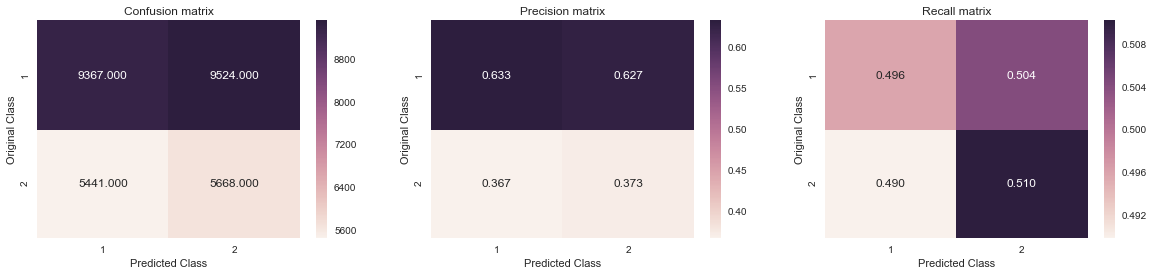

In [15]:
# we need to generate 9 numbers and the sum of numbers should be 1
# one solution is to genarate 9 numbers and divide each of the numbers by their sum
# ref: https://stackoverflow.com/a/18662466/4084039
# we create a output array that has exactly same size as the CV data\
sns.set(color_codes=False)
predicted_y = np.zeros((test_len,2))
for i in range(test_len):
    rand_probs = np.random.rand(1,2)
    predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log-loss on Test Data using Random Model",log_loss(y_test, predicted_y, eps=1e-15))


predicted_y =np.argmax(predicted_y, axis=1)
plot_confusion_matrix(y_test, predicted_y)

<h2> 4.4 Logistic Regression with hyperparameter tuning </h2>

For values of alpha =  1e-05 The log loss is: 0.5579668737326461
For values of alpha =  0.0001 The log loss is: 0.5302227573042799
For values of alpha =  0.001 The log loss is: 0.5189050271364599
For values of alpha =  0.01 The log loss is: 0.5258915834470564
For values of alpha =  0.1 The log loss is: 0.5190980385750008
For values of alpha =  1 The log loss is: 0.5097309558358608
For values of alpha =  10 The log loss is: 0.5185575476065574


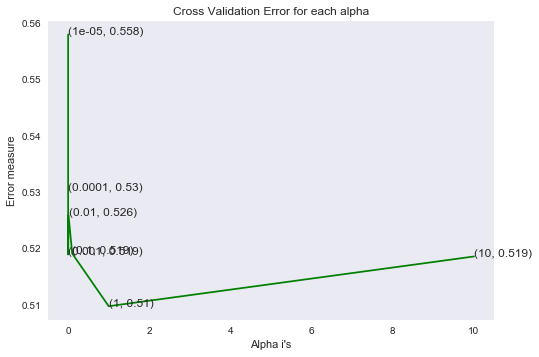

For values of best alpha =  1 The train log loss is: 0.503123729869425
For values of best alpha =  1 The test log loss is: 0.5097309558358608
Total number of data points : 30000


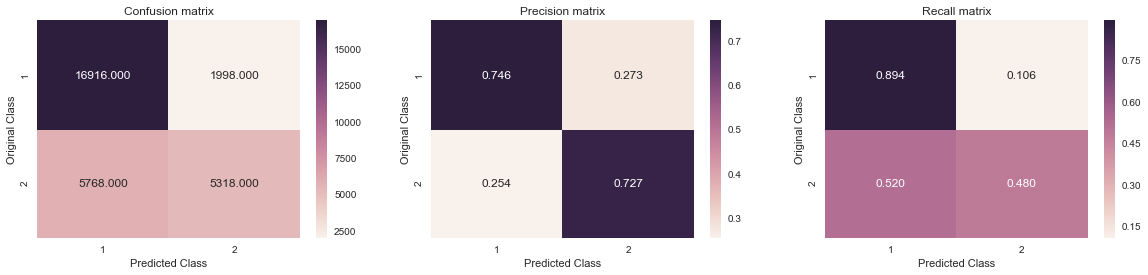

In [15]:
alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.
log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(X_train, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_test)
    log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(X_train, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train, y_train)

predict_y = sig_clf.predict_proba(X_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

<h2> 4.5 Linear SVM with hyperparameter tuning </h2>

For values of alpha =  1e-05 The log loss is: 0.4838677815916208
For values of alpha =  0.0001 The log loss is: 0.49715468632184784
For values of alpha =  0.001 The log loss is: 0.5268001495836679
For values of alpha =  0.01 The log loss is: 0.5651697016995743
For values of alpha =  0.1 The log loss is: 0.5983812209125846
For values of alpha =  1 The log loss is: 0.6334599699066084
For values of alpha =  10 The log loss is: 0.6420828523352818


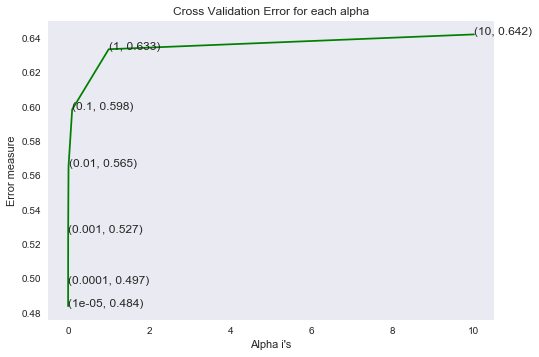

For values of best alpha =  1e-05 The train log loss is: 0.4752031184092973
For values of best alpha =  1e-05 The test log loss is: 0.4838677815916208
Total number of data points : 30000


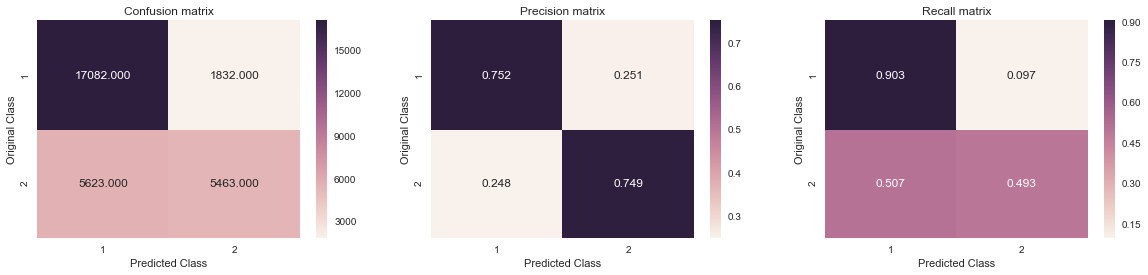

In [16]:
alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.
log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l1', loss='hinge', random_state=42)
    clf.fit(X_train, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_test)
    log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l1', loss='hinge', random_state=42)
clf.fit(X_train, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train, y_train)

predict_y = sig_clf.predict_proba(X_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

<h2> 4.6 XGBoost </h2>

In [17]:
import xgboost as xgb
params = {}
params['objective'] = 'binary:logistic'
params['eval_metric'] = 'logloss'
params['eta'] = 0.02
params['max_depth'] = 4

d_train = xgb.DMatrix(X_train, label=y_train)
d_test = xgb.DMatrix(X_test, label=y_test)

watchlist = [(d_train, 'train'), (d_test, 'valid')]

bst = xgb.train(params, d_train, 400, watchlist, early_stopping_rounds=20, verbose_eval=10)

xgdmat = xgb.DMatrix(X_train,y_train)
predict_y = bst.predict(d_test)
print("The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

[0]	train-logloss:0.684857	valid-logloss:0.684927
Multiple eval metrics have been passed: 'valid-logloss' will be used for early stopping.

Will train until valid-logloss hasn't improved in 20 rounds.
[10]	train-logloss:0.615387	valid-logloss:0.615996
[20]	train-logloss:0.564408	valid-logloss:0.565471
[30]	train-logloss:0.526219	valid-logloss:0.527818
[40]	train-logloss:0.496709	valid-logloss:0.498873
[50]	train-logloss:0.473843	valid-logloss:0.476493
[60]	train-logloss:0.455449	valid-logloss:0.458608
[70]	train-logloss:0.44092	valid-logloss:0.444468
[80]	train-logloss:0.42911	valid-logloss:0.433086
[90]	train-logloss:0.419408	valid-logloss:0.423795
[100]	train-logloss:0.411281	valid-logloss:0.415989
[110]	train-logloss:0.404488	valid-logloss:0.409528
[120]	train-logloss:0.39877	valid-logloss:0.404117
[130]	train-logloss:0.394171	valid-logloss:0.399752
[140]	train-logloss:0.390017	valid-logloss:0.395856
[150]	train-logloss:0.3865	valid-logloss:0.39261
[160]	train-logloss:0.383212	valid

Total number of data points : 30000


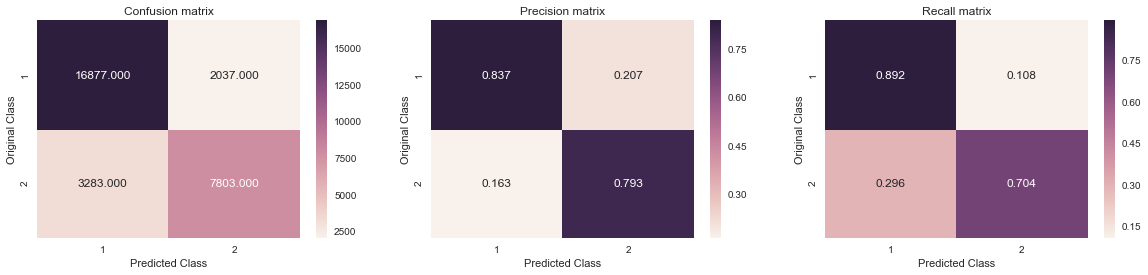

In [18]:
predicted_y =np.array(predict_y>0.5,dtype=int)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

# Perform Modelling on complete dataset with simple TF-IDF Features

In [2]:
import pandas as pd

In [3]:
# avoid decoding problems
df_basic_features = pd.read_csv("df_fe_without_preprocessing_train.csv",encoding="latin-1")
df_basic_features.head(5)

,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_Common,word_Total,word_share,freq_q1+q2,freq_q1-q2
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,1,1,66,57,14,12,10.0,23.0,0.434783,2,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,4,1,51,88,8,13,4.0,20.0,0.200000,5,3
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,1,1,73,59,14,10,4.0,24.0,0.166667,2,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,1,1,50,65,11,9,0.0,19.0,0.000000,2,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,3,1,76,39,13,7,2.0,20.0,0.100000,4,2


In [4]:
print("\n Number of Columns:", len(df_basic_features.columns))


 Number of Columns: 17


In [5]:
# Load Advance Features

df_Advance_features= pd.read_csv("nlp_features_train.csv",encoding="latin-1")

In [6]:
print("\n Number of Columns:", len(df_Advance_features.columns))
df_Advance_features.head(5)


 Number of Columns: 21


,id,qid1,qid2,question1,question2,is_duplicate,cwc_min,cwc_max,csc_min,csc_max,...,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,token_set_ratio,token_sort_ratio,fuzz_ratio,fuzz_partial_ratio,longest_substr_ratio
0,0,1,2,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0,0.999980,0.833319,0.999983,0.999983,...,0.785709,0.0,1.0,2.0,13.0,100,93,93,100,0.982759
1,1,3,4,what is the story of kohinoor koh i noor dia...,what would happen if the indian government sto...,0,0.799984,0.399996,0.749981,0.599988,...,0.466664,0.0,1.0,5.0,12.5,86,63,66,75,0.596154
2,2,5,6,how can i increase the speed of my internet co...,how can internet speed be increased by hacking...,0,0.399992,0.333328,0.399992,0.249997,...,0.285712,0.0,1.0,4.0,12.0,66,66,54,54,0.166667
3,3,7,8,why am i mentally very lonely how can i solve...,find the remainder when math 23 24 math i...,0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,2.0,12.0,36,36,35,40,0.039216
4,4,9,10,which one dissolve in water quikly sugar salt...,which fish would survive in salt water,0,0.399992,0.199998,0.999950,0.666644,...,0.307690,0.0,1.0,6.0,10.0,67,47,46,56,0.175000


In [7]:
# Columns dropped from basic feature dataframe

df_basic_features= df_basic_features.drop(["qid1","qid2"],axis=1)

# Columns dropped from advance feature dataframe

df_Advance_features= df_Advance_features.drop(["qid1","qid2","question1","question2","is_duplicate"],axis=1)

# Lets add both the truncated dataframe into one dataframe

df_all_features= df_basic_features.merge(df_Advance_features, on="id", how="left")

In [8]:
nan_rows= df_all_features[df_all_features.isnull().any(1)]

In [9]:
print(nan_rows)

            id                         question1 question2  is_duplicate  \
105780  105780    How can I develop android app?       NaN             0   
201841  201841  How can I create an Android app?       NaN             0   

        freq_qid1  freq_qid2  q1len  q2len  q1_n_words  q2_n_words  \
105780          2          2     30      0           6           1   
201841          1          2     32      0           7           1   

                ...           ctc_max  last_word_eq  first_word_eq  \
105780          ...               0.0           0.0            0.0   
201841          ...               0.0           0.0            0.0   

        abs_len_diff  mean_len  token_set_ratio  token_sort_ratio  fuzz_ratio  \
105780           0.0       0.0                0                 0           0   
201841           0.0       0.0                0                 0           0   

        fuzz_partial_ratio  longest_substr_ratio  
105780                   0                   0.0  
201

<b>Observations:</b>
    <li>Found two rows, we will remove these rows from the original dataset.</li>

In [11]:
df_all_features= df_all_features[df_all_features['question1'].notnull()]
df_all_features= df_all_features[df_all_features['question2'].notnull()]

In [12]:
nan_rows= df_all_features[df_all_features.isnull().any(1)]
print(nan_rows)

Empty DataFrame
Columns: [id, question1, question2, is_duplicate, freq_qid1, freq_qid2, q1len, q2len, q1_n_words, q2_n_words, word_Common, word_Total, word_share, freq_q1+q2, freq_q1-q2, cwc_min, cwc_max, csc_min, csc_max, ctc_min, ctc_max, last_word_eq, first_word_eq, abs_len_diff, mean_len, token_set_ratio, token_sort_ratio, fuzz_ratio, fuzz_partial_ratio, longest_substr_ratio]
Index: []

[0 rows x 30 columns]


In [13]:
df_all_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404288 entries, 0 to 404289
Data columns (total 30 columns):
id                      404288 non-null int64
question1               404288 non-null object
question2               404288 non-null object
is_duplicate            404288 non-null int64
freq_qid1               404288 non-null int64
freq_qid2               404288 non-null int64
q1len                   404288 non-null int64
q2len                   404288 non-null int64
q1_n_words              404288 non-null int64
q2_n_words              404288 non-null int64
word_Common             404288 non-null float64
word_Total              404288 non-null float64
word_share              404288 non-null float64
freq_q1+q2              404288 non-null int64
freq_q1-q2              404288 non-null int64
cwc_min                 404288 non-null float64
cwc_max                 404288 non-null float64
csc_min                 404288 non-null float64
csc_max                 404288 non-null float64

In [14]:
df_all_features.head(5)

,id,question1,question2,is_duplicate,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,...,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,token_set_ratio,token_sort_ratio,fuzz_ratio,fuzz_partial_ratio,longest_substr_ratio
0,0,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,1,1,66,57,14,12,...,0.785709,0.0,1.0,2.0,13.0,100,93,93,100,0.982759
1,1,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,4,1,51,88,8,13,...,0.466664,0.0,1.0,5.0,12.5,86,63,66,75,0.596154
2,2,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,1,1,73,59,14,10,...,0.285712,0.0,1.0,4.0,12.0,66,66,54,54,0.166667
3,3,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,1,1,50,65,11,9,...,0.000000,0.0,0.0,2.0,12.0,36,36,35,40,0.039216
4,4,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,3,1,76,39,13,7,...,0.307690,0.0,1.0,6.0,10.0,67,47,46,56,0.175000


In [15]:
target= df_all_features["is_duplicate"]

In [16]:
df_all_features.drop(["id","is_duplicate"],axis=1, inplace=True)

In [17]:
len(df_all_features.columns)

28

# Perform Simple TF-IDF Tokenization on columns- "question1","question2"

In [18]:
tfidfvectorizer_question_1 = TfidfVectorizer()
question1_dtm= tfidfvectorizer_question_1.fit_transform(df_all_features["question1"].values.astype("U"))

In [19]:
tfidfvectorizer_question_2 = TfidfVectorizer()
question2_dtm= tfidfvectorizer_question_2.fit_transform(df_all_features["question2"].values.astype("U"))

In [20]:
print("{0} features got from question1 column". format(len(tfidfvectorizer_question_1.get_feature_names())))
print("{0} features got from question2 column". format(len(tfidfvectorizer_question_2.get_feature_names())))

67525 features got from question1 column
62332 features got from question2 column


In [21]:
# Combine all the features in question1 and question2
question1_question2= hstack((question1_dtm,question2_dtm))

In [22]:
type(question1_question2)

scipy.sparse.coo.coo_matrix

In [26]:
# Drop unnecessary question1 and question2 columns
df_all_features.drop(['question1','question2'], axis=1, inplace=True)

In [27]:
df_all_tfidf_features= hstack((df_all_features,question1_question2),format="csr",dtype="float64")

In [28]:
df_all_tfidf_features.shape

(404288, 129883)

# Train and Test Splitting of data

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(df_all_tfidf_features, target, stratify=target, test_size=0.3)

In [30]:
print("Number of data point in train data:",X_train.shape)
print("Number of data points in test data:",X_test.shape)

Number of data point in train data: (283001, 129883)
Number of data points in test data: (121287, 129883)


# Logistic Regression

For values of alpha =  1e-05 
 The log loss is: 0.4454254590569791
For values of alpha =  0.0001 
 The log loss is: 0.4414358954726849
For values of alpha =  0.001 
 The log loss is: 0.44157806621467577
For values of alpha =  0.01 
 The log loss is: 0.4439067115864165
For values of alpha =  0.1 
 The log loss is: 0.46132136377662947
For values of alpha =  1 
 The log loss is: 0.4925445965868643
For values of alpha =  10 
 The log loss is: 0.5480233501638435


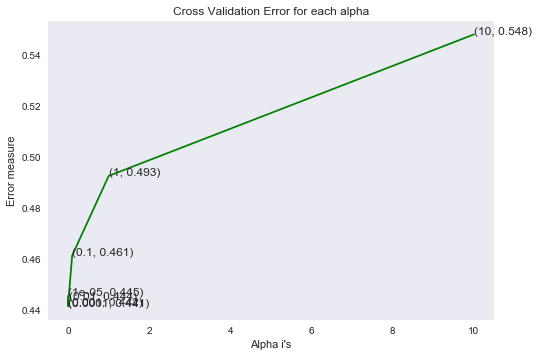

For values of best alpha =  0.0001 The train log loss is: 0.4386147464916498
For values of best alpha =  0.0001 The test log loss is: 0.4414358954726849
Total number of data points : 121287


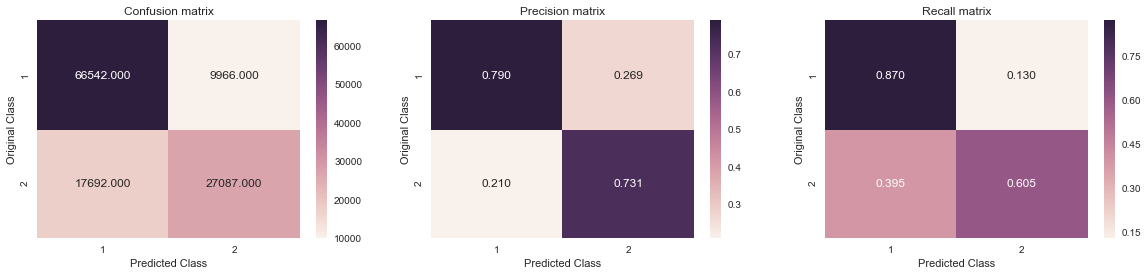

In [109]:
alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html

log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(X_train, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_test)
    log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "\n The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(X_train, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train, y_train)

predict_y = sig_clf.predict_proba(X_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

# Linear SVM

For values of alpha =  1e-05 
 The log loss is: 0.4379105839554317
For values of alpha =  0.0001 
 The log loss is: 0.48134877605432785
For values of alpha =  0.001 
 The log loss is: 0.5079265384398146
For values of alpha =  0.01 
 The log loss is: 0.5209007635434537
For values of alpha =  0.1 
 The log loss is: 0.49784393674010474
For values of alpha =  1 
 The log loss is: 0.5851232186301534
For values of alpha =  10 
 The log loss is: 0.6507181678427523


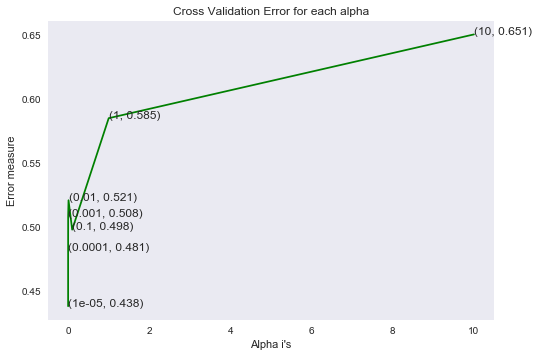

For values of best alpha =  1e-05 The train log loss is: 0.4358475742639991
For values of best alpha =  1e-05 The test log loss is: 0.4379105839554317
Total number of data points : 121287


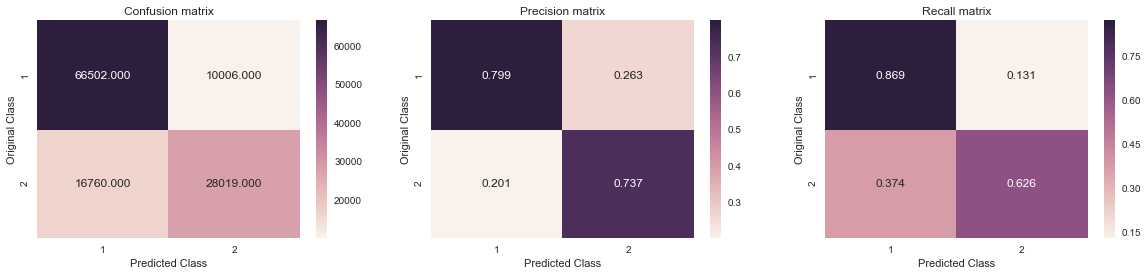

In [110]:
alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l1', loss='hinge', random_state=42)
    clf.fit(X_train, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_test)
    log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "\n The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l1', loss='hinge', random_state=42)
clf.fit(X_train, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train, y_train)

predict_y = sig_clf.predict_proba(X_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

# XGBoost Hyper Parameter Tuning

In [33]:
# https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-pythonth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
param_grid = { "n_estimators": [20,100,200], "learning_rate":  [0.001, 0.01, 0.1], "max_depth":[2,3,4]}

model1 = XGBClassifier()
model_rs = RandomizedSearchCV(model1, param_grid, cv = 3,n_iter=5)
rs_fit = model_rs.fit(X_train, y_train) 
best_n_estimators = rs_fit.best_estimator_.n_estimators
best_learning_rate = rs_fit.best_estimator_.learning_rate
best_max_depth = rs_fit.best_estimator_.max_depth


print("_"*100)
print("After Hyperparameter tuning we got \n")
print("Best N_estimator : ", best_n_estimators)
print("Best Learning Rate : ", best_learning_rate)
print("Best Depth:", best_max_depth)

print("_"*100)

____________________________________________________________________________________________________
After Hyperparameter tuning we got 

Best N_estimator :  200
Best Learning Rate :  0.1
Best Depth: 4
____________________________________________________________________________________________________


In [34]:
import xgboost as xgb

params = {"objective": "binary:logistic", "eval_metric": "logloss", "learning_rate": best_learning_rate, "max_depth": best_max_depth, "n_estimators":best_n_estimators}
params["silent"] = 1

d_train = xgb.DMatrix(X_train, label=y_train)
d_test = xgb.DMatrix(X_test, label=y_test)

watchlist = [(d_train, 'train'), (d_test, 'valid')]

bst = xgb.train(params, d_train, 400, watchlist, early_stopping_rounds=20, verbose_eval=10)

xgdmat = xgb.DMatrix(X_train,y_train)
predict_y = bst.predict(d_test)

#print("The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

[0]	train-logloss:0.653362	valid-logloss:0.653533
Multiple eval metrics have been passed: 'valid-logloss' will be used for early stopping.

Will train until valid-logloss hasn't improved in 20 rounds.
[10]	train-logloss:0.464135	valid-logloss:0.464755
[20]	train-logloss:0.407926	valid-logloss:0.408862
[30]	train-logloss:0.385339	valid-logloss:0.386406
[40]	train-logloss:0.373894	valid-logloss:0.375264
[50]	train-logloss:0.365365	valid-logloss:0.367016
[60]	train-logloss:0.359351	valid-logloss:0.361344
[70]	train-logloss:0.355538	valid-logloss:0.357681
[80]	train-logloss:0.352126	valid-logloss:0.354642
[90]	train-logloss:0.349283	valid-logloss:0.352118
[100]	train-logloss:0.346525	valid-logloss:0.349573
[110]	train-logloss:0.344845	valid-logloss:0.348113
[120]	train-logloss:0.342706	valid-logloss:0.346187
[130]	train-logloss:0.340688	valid-logloss:0.344476
[140]	train-logloss:0.338989	valid-logloss:0.342962
[150]	train-logloss:0.337351	valid-logloss:0.34157
[160]	train-logloss:0.336043	

The test log loss is: 0.3252543682420048
Total number of data points : 121287


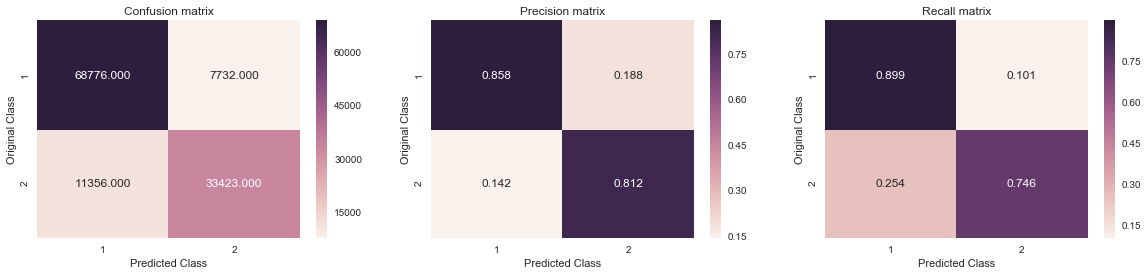

In [37]:
print("The test log loss is:",log_loss(y_test, predict_y, eps=1e-15))
predicted_y =np.array(predict_y>0.5,dtype=int)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

# Conclusion

In [2]:
from prettytable import PrettyTable
ptable= PrettyTable()
print("\t \t \t \t \t \t  Model Comparison")  
x = PrettyTable(["S.NO.","Model Name","Data Points Taken","Tokenizer","Test-Log Loss"])
x.add_row([1,"Random Model",30000,"TFIDF Weighted W2V", 0.8966])
x.add_row([2,"Logistic Regression with Hyperparameter Tuning",30000,"TFIDF Weighted W2V" ,0.5097 ])
x.add_row([3, "Linear SVM with Hyperparameter Tuning",30000, "TFIDF Weighted W2V" , 0.4838])
x.add_row([4,"XGBoost with Hyperparameter Tuning",30000,"TFIDF Weighted W2V", 0.3596 ])
x.add_row([5,"Logistic Regression with Hyperparameter Tuning", 121287, "TFIDF", 0.4414])
x.add_row([6,"Linear SVM with Hyperparameter Tuning", 121287, "TFIDF",  0.4379])
x.add_row([7,"XGBoost with Hyperparameter Tuning", 12128, "TFIDF", 0.3252])

print(x.get_string(title="PrettyTable"))

	 	 	 	 	 	  Model Comparison
+-------+------------------------------------------------+-------------------+--------------------+---------------+
| S.NO. |                   Model Name                   | Data Points Taken |     Tokenizer      | Test-Log Loss |
+-------+------------------------------------------------+-------------------+--------------------+---------------+
|   1   |                  Random Model                  |       30000       | TFIDF Weighted W2V |     0.8966    |
|   2   | Logistic Regression with Hyperparameter Tuning |       30000       | TFIDF Weighted W2V |     0.5097    |
|   3   |     Linear SVM with Hyperparameter Tuning      |       30000       | TFIDF Weighted W2V |     0.4838    |
|   4   |       XGBoost with Hyperparameter Tuning       |       30000       | TFIDF Weighted W2V |     0.3596    |
|   5   | Logistic Regression with Hyperparameter Tuning |       121287      |       TFIDF        |     0.4414    |
|   6   |     Linear SVM with Hyperparamet

<li>As Data point increases, Logistic Regression and Linear SVM starts to perform well, whereas XGBoost gives almost same results after hyperparameter Tuning.</li>


# Steps of Model Implementation:

<h2><b>Tokenizer: TFIDF Weighted W2V</b></h2>
 <ol>   
<li> First, we have taken 100k Data Points then split them into Train(70k) and Test Data(30k),we have applied simple Random Model which has given the Log Loss of 0.8966 but as we want the minimise value of Log Loss. So, we tried other Model.</li>
<li> We have applied Logitic Regression with Hyperparameter Tuning, which has given the Test Log Loss of 0.5097 which is signifanctly lower than Random Model.</li>
<li> We have applied Linear SVM with Hyperparameter Tuning, which has given the Test Log Loss of 0.4838 which is slightly lower than the Logistic Regression.</li>
<li> We applied XGBoost with Hyperparameter Tuning, which has given the Test Log Loss of 0.3596, which is significantly lower than Linear SVM.</li>
</ol>

<blockquote>We have taken 30k Data Points for Models Hyperparameter tuning. For better results we should use more data points.</blockquote>


<h2><b>Tokenizer: TFIDF</b></h2>
<ol>
<li> First, we have taken 400k Data Points then split them into Train(k) and Test Data(k), we have applied Logistic Regression Model with Hyperparameter Tuning which has given the Log Loss of 0.4414
<li> We applied Linear SVM Model with Hyperparameter Tuning which has given the Log Loss of 0.4379.
<li> We applied XGBoost Model which has given the Log Loss of 0.3252 which is slightly lower than the XGBoost with TFIDF Weighted W2V
</ol>

<blockquote> We conclude that as we increase the data points and use Logistic Regression, Linear SVM, XGBoost with Hyperparameter results in lower Log Loss.</blockquote>

<b>References:</b>
    <li>https://github.com/mangeshingle/Quora-Question-Pair-Similarity-Problem/blob/master/Quora%20Question%20Pair%20Similarity%20Problem.ipynb</li>
        